# Data Wrangling with Open Street Map of Doha, Qatar

### Map Area

For this project, I have decided to use data from the city of Doha in Qatar because that is where I have been living for a few years. The data was an OSM XML file downloaded from a metro extract on Mapzen. The data can found [here](https://mapzen.com/data/metro-extracts/metro/doha_qatar/).
The file used has a size of 60.191 Mb, which is manageable. The entire dataset was used for exploration and auditing, rather than a smaller sample.
 
**Note:** This data was downloaded on 10-September-2017 and may change in content and/or availability.

### Initial Data exploration

The file used has a size of 60.191 Mb, which is manageable. The entire dataset was used for exploration and auditing, rather than a smaller sample.

#### Tag types

In [1]:
from get_data import get_tag_types
get_tag_types("doha_qatar.osm")

There is a total of 830157 tags in the Doha osm file
The breakdown of those tags is:-


[('nd', 319832),
 ('node', 249108),
 ('tag', 209647),
 ('way', 46654),
 ('member', 3936),
 ('relation', 978),
 ('bounds', 1),
 ('osm', 1)]

Next, we look at the breakdown of all parent and child elements in the file:

In [2]:
from get_data import iter_get_tag_types
iter_get_tag_types("doha_qatar.osm")

There is a total of 830157 tags (parent and child) in the Doha osm file
The breakdown of those tags is:


[('nd', 319832),
 ('node', 249108),
 ('tag', 209647),
 ('way', 46654),
 ('member', 3936),
 ('relation', 978),
 ('bounds', 1),
 ('osm', 1)]

Then, we look at the most occuring key values used in the tags used to describe the *nodes* in the dataset.

#### Node types

In [3]:
from get_data import elem_tag_types
Results = elem_tag_types("doha_qatar.osm","node"); Results[0:20]

[('name', 5078),
 ('source', 4549),
 ('addr:street', 3545),
 ('shop', 3255),
 ('power', 1806),
 ('amenity', 1658),
 ('highway', 1037),
 ('barrier', 533),
 ('created_by', 499),
 ('name:en', 435),
 ('tourism', 287),
 ('addr:housenumber', 277),
 ('name:ar', 245),
 ('addr:city', 245),
 ('office', 242),
 ('cuisine', 206),
 ('addr:country', 141),
 ('traffic_signals', 140),
 ('man_made', 131),
 ('operator', 127)]

The complete list can be found in Appendix A.

### Problems with the map

#### Confusing tag key

After a quick inspection of those tags, it seems odd that there is a tag key named "created_by", when there is a dedicated attribute "user" attribute for each element, indicating its contributor. Let's look at the first 3 nodes containing this key in its tags:

In [4]:
from get_data import inspect_by_tag,disp_complete_elem
results=inspect_by_tag("doha_qatar.osm","node","created_by")
disp_complete_elem(results,3)

Inspecting Element 0:
[('changeset', '551724'), ('uid', '4772'), ('timestamp', '2007-11-18T13:46:21Z'), ('lon', '51.5514899'), ('version', '1'), ('user', 'dmgroom_coastlines'), ('lat', '25.6274158'), ('id', '121831156')]
Tags in this element:
[('k', 'created_by'), ('v', 'JOSM')]
Inspecting Element 1:
[('changeset', '551724'), ('uid', '4772'), ('timestamp', '2007-11-18T13:46:21Z'), ('lon', '51.5520577'), ('version', '1'), ('user', 'dmgroom_coastlines'), ('lat', '25.6274136'), ('id', '121831157')]
Tags in this element:
[('k', 'created_by'), ('v', 'JOSM')]
Inspecting Element 2:
[('changeset', '551724'), ('uid', '4772'), ('timestamp', '2007-11-18T13:46:21Z'), ('lon', '51.5506383'), ('version', '1'), ('user', 'dmgroom_coastlines'), ('lat', '25.6274191'), ('id', '121831162')]
Tags in this element:
[('k', 'created_by'), ('v', 'JOSM')]


It seems like the same contributor "dmgroom_coastlines" might have created all of the nodes containing this key. If this was the case, then it would be expected to have a small number of elements containing this tag.

In [5]:
len(results)

661

This large number warrants a closer inspection. Let's look at all of the values for the key "created_by" and their corresponding contributors.

In [6]:
from get_data import created_by_users
created_by_users(results)

[('Skywave', 'Potlatch 0.8c'),
 ('OJW', 'Potlatch 0.10b'),
 ('MR_Claude', 'Potlatch 0.10b'),
 ('dmgroom', 'JOSM'),
 ('dmgroom_coastlines', 'JOSM')]

It looks like two users were responsible for these entries. The nature of their "created_by" values, and the number of entries they have contributed to suggests that they might be bots.

#### Multiple languages

Looking further into the list of tag keys, there are "name:en" and "name:ar", for the English and equivalent Arabic name of some venues, as is expected. Oher languages include French and Turkish.

#### Breast

There is a surprising key "breast" which was used 37 times. This odd find needs some looking into:

In [7]:
results=inspect_by_tag("doha_qatar.osm","node","breast")
disp_complete_elem(results)

Inspecting Element 0:
[('changeset', '50431357'), ('uid', '6063818'), ('timestamp', '2017-07-20T12:01:27Z'), ('lon', '51.4884776'), ('version', '1'), ('user', 'Qatar University'), ('lat', '25.3735734'), ('id', '4982617771')]
Tags in this element:
[('k', 'breast'), ('v', '0')]
[('k', 'height'), ('v', '10')]
[('k', 'width'), ('v', '3')]
[('k', 'window'), ('v', 'yes/fixed')]
Inspecting Element 1:
[('changeset', '50431357'), ('uid', '6063818'), ('timestamp', '2017-07-20T12:01:27Z'), ('lon', '51.4887331'), ('version', '1'), ('user', 'Qatar University'), ('lat', '25.3736765'), ('id', '4982617772')]
Tags in this element:
[('k', 'breast'), ('v', '0')]
[('k', 'height'), ('v', '10')]
[('k', 'width'), ('v', '2.85')]
[('k', 'window'), ('v', 'yes/fixed')]
Inspecting Element 2:
[('changeset', '50431357'), ('uid', '6063818'), ('timestamp', '2017-07-20T12:01:28Z'), ('lon', '51.4887135'), ('version', '1'), ('user', 'Qatar University'), ('lat', '25.3736845'), ('id', '4982617773')]
Tags in this element:


All other instances look similar to this one, and "breast" always takes on a value of 0. I assume from this that they all describe windows at Qatar University, and that "breast" is just a misspelled measurement dimension.

#### False Streets

A quick look at the street names revealed that there are many entries with the tag "way",which didn't describe any streets at all. In order to get an estimate of the number of false streets, I have compiled a short list of common words which occured in them.

In [8]:
from audit import problem_words
print problem_words

['school', 'district', 'compound', 'office', 'schule', 'mall', 'mart', 'center', 'parking', 'clinic', 'station', 'kindergarten', 'centre', 'complex', 'lounge', 'restaurant', 'grocery', 'supermarket', 'cafeteria', 'group', 'village', 'villa', 'villas', 'hotel', 'nursery']


This list was in no way complete, but it did reveal that there was a large number of places which was mistakenly categrorized as a "way" rather than a "node". Some "relations" such as roundabouts and interchanges are also entered as "nodes".

In [9]:
from audit import get_street_names,check_problem_streets
names=get_street_names("doha_qatar.osm")
false_streets=check_problem_streets(names)
print "There are {} such entries. Here are some examples:".format(len(false_streets))
print false_streets[0:5]

There are 724 such entries. Here are some examples:
['Merweb Hotel', 'The Center', 'Al Nahda School', 'Souq Parking Lot South', 'Nissan Petrol Station']


This number is worrying, and there needs to be a better and more comprehensive method of identifying false streets before they can be correctly reclassified as nodes.

One thing to note from my experience living here, is that most street names in Doha end in "Street" or "Road" or abbreviations thereof. I wanted to check if some of the other street types, "Avenue", "Boulevard", and "Way" are used here.

In [10]:
from audit import check_alt_streets
alt_streets=check_alt_streets(names)
print "There are {} streets with these alternative street types. Here are some examples:".format(len(alt_streets))
print alt_streets[0:20]

There are 68 streets with these alternative street types. Here are some examples:
['Marina Way 1', 'Marina 8 Way', 'Marina Way 2', 'Via Marsa Arabia Way', 'Via Marsa Arabia Way', 'Marina Way 30', 'Via Marsa Arabia Way', 'Via Marsa Arabia Way', 'Via Marsa Arabia Way', 'Via Marsa Arabia Way', 'Pearl Boulevard', 'Pearl Boulevard', 'Pearl Boulevard', 'Pearl Boulevard', 'Pearl Boulevard', 'Pearl Boulevard', 'Pearl Boulevard', 'Pearl Boulevard', 'Pearl Boulevard', 'Pearl Boulevard']


Looking at the entire list, it looks like these streets occur almost exclusively at The Pearl and QIPCO compound. This is interesting because both of these places are very popular among western expats.

#### City Address

Lets inspect the 'addr:city' and 'addr:coutry' fields in the nodes, to see what kind of values they contain.

In [11]:
from audit import audit_nodes
print "The existing values for the field 'addr:city' are:"
print audit_nodes("doha_qatar.osm","addr:city")
print "And the existing values for the field 'addr:country' are:"
print audit_nodes("doha_qatar.osm","addr:country")

The existing values for the field 'addr:city' are:
[('Doha', 200), ('Ain Khalid Gate', 41), ('doha', 2), ('Doha City', 1), ('Qatar', 1)]
And the existing values for the field 'addr:country' are:
[('QA', 141)]


The values for "addr:country" are consistent, however, that is not the case with the "addr:city" field. Only a few nodes have this key present, and there are a few existing variations of its value. Also Ain Khalid Gate lies within Doha. These values should all be changed to "Doha".

### Export to MongoDb

In this process, the data is cleaned, reshaped, and saved as JSON documents for export to MongoDb

#### Data Cleaning:

* The "addr:city" fields are fixed as discussed earlier
* All "ways" which were identified as "false streets" are ignored. The list used to identify them is updated. This step is done several time until the street values are sufficiently clean.
* The node key "breast" is replaced with "breadth".

#### Reshaping:

* Only entities with tags "way" and "node" are exported.
* The tag of each entity is added to a field named "tag_type".
* Every second-level tag containing a colon (:) such as "addr:city" and "addr:country" will be reshaped into a subdocuments within a document; i.e. {"address":{["country","city"]}}
* latitude and longitude values are added as float numbers to an array named "position"
* Fields pertaining to the creation of the entity are added as subdocuments under a document "created".
* For ways, all reference nodes "nd ref" are added to an array named "node_ref".
* If an entitity lacks a "name" key in its tags, but has its name in different languages stored under keys "name:en","name:ar",etc, The english name "name:en" is used as its name, and the other name fields are stored in a list under "other_names".

#### Exporting:

The entities are saved as JSON documents in a file, and saved as a collection in a MongoDB database.

In [12]:
#from audit import process_map
#process_map("doha_qatar.osm")

#### File Sizes

Downloaded XML file - 60 MB - doha_qatar.osm
Exported JSON file - 68 MB - doha_qatar.osm.json

#### Number of entries/documents

Downloaded XML file - 296,741 entries - doha_qatar.osm
Exported JSON file - 295,156 - doha_qatar.osm.json

## Data Exploration

The JSON file doha_qatar.osm.json is imported to a MongoDb collection called doha_qatar, under a data base called osm.

In [13]:
#from process_data import import_json
#import_json(""doha_qatar.osm.json"")


Now that our database is created, a connection can be made using pymongo in order to query it.

In [14]:
from pymongo import MongoClient
client = MongoClient()
doha = client.osm.doha_qatar

#### Number of Documents

In [15]:
doha.count()

295156

#### Number of Nodes and Ways

In [16]:
nodes=doha.find({"tag_type":"node"}).count()
ways=doha.find({"tag_type":"way"}).count()
print "There are {} nodes and {} ways.".format(nodes,ways)

There are 249108 nodes and 46048 ways.


#### Number of unique contributors

In [17]:
results=doha.distinct("created.user")
len(results)

696

#### Top contributors

In [18]:
from pprint import pprint
pipeline=[{"$group":{"_id":"$created.user","count":{"$sum":1}}},
          {"$sort":{"count":-1}},
          {"$limit":10}]
results=doha.aggregate(pipeline)
pprint(list(results))

[{u'_id': u'airlifter', u'count': 29529},
 {u'_id': u'Seandebasti', u'count': 24728},
 {u'_id': u'endo', u'count': 19842},
 {u'_id': u'Baconcrisp', u'count': 17578},
 {u'_id': u'gjall1973', u'count': 14422},
 {u'_id': u'rovingmedic', u'count': 13572},
 {u'_id': u'eXmajor', u'count': 13181},
 {u'_id': u'robgeb', u'count': 12464},
 {u'_id': u'garylancelot', u'count': 12105},
 {u'_id': u'lyx', u'count': 8354}]


#### Amenities

Let's look at the most occuring amenities.

In [19]:
pipeline=[{"$match":{"amenity":{"$exists":1}}},
          {"$group":{"_id":"$amenity","count":{"$sum":1}}},
          {"$sort":{"count":-1}},
          {"$limit":5}]
pprint(list(doha.aggregate(pipeline)))

[{u'_id': u'restaurant', u'count': 597},
 {u'_id': u'parking', u'count': 490},
 {u'_id': u'place_of_worship', u'count': 470},
 {u'_id': u'school', u'count': 197},
 {u'_id': u'cafe', u'count': 148}]


#### Restaurants

In [20]:
pipeline=[{"$match":{"name":{"$exists":1}}},
          {"$match":{"amenity":"restaurant"}},
          {"$group":{"_id":"$name","count":{"$sum":1}}},
          {"$sort":{"count":-1}},
          {"$limit":10}]
pprint(list(doha.aggregate(pipeline)))

[{u'_id': u'Pizza Hut', u'count': 10},
 {u'_id': u'Afghan Brothers Restaurant', u'count': 3},
 {u'_id': u'Hot Chicken', u'count': 3},
 {u'_id': u'Marhaba Istambul', u'count': 3},
 {u'_id': u'Khaiber Restaurant', u'count': 2},
 {u'_id': u'Sky Restaurant', u'count': 2},
 {u'_id': u'Choice Restaurant', u'count': 2},
 {u'_id': u'Jawahar Restaurant', u'count': 2},
 {u'_id': u'Own Pizza', u'count': 2},
 {u'_id': u'Al-Kababji', u'count': 2}]


I was surprised to see that Mcdonald's was not on this list, so I looked at the other amenities and found that other than "restaurant", there is also "fast_food" which might cover Mcdonald's. I decided to look at both of these, and cafes to see which "food" amenities had the most branches in Doha.

In [21]:
pipeline=[{"$match":{"name":{"$exists":1}}},
          {"$match":{"amenity":{"$in":["restaurant","cafe","fast_food"]}}},
          {"$group":{"_id":"$name","count":{"$sum":1}}},
          {"$sort":{"count":-1}},
          {"$limit":10}]
pprint(list(doha.aggregate(pipeline)))

[{u'_id': u'KFC', u'count': 16},
 {u'_id': u'Pizza Hut', u'count': 11},
 {u'_id': u"McDonald's", u'count': 10},
 {u'_id': u"Papa John's", u'count': 10},
 {u'_id': u'Subway', u'count': 9},
 {u'_id': u'Baskin Robbins', u'count': 9},
 {u'_id': u'Burger King', u'count': 7},
 {u'_id': u"Hardee's", u'count': 7},
 {u'_id': u'Caribou Coffee', u'count': 6},
 {u'_id': u'Costa', u'count': 5}]


These results are much more realistic, but not accurate. A cross-check with www.zomato.com reveals that there is closer to 23 McDonald's in Doha rather than 10, and 35 KFCs as opposed to 16. This suggests that this data is incomplete.

#### Malls

Because it seems like there is a handful of few malls being completed every year in Doha, I wanted to see how many there were.

In [22]:
pipeline1=[{"$match":{"shop":"mall"}}]
pipeline2=[{"$match":{"shop":"mall"}},
          {"$project":{"_id":0,"name":1}},
          {"$limit":5}]
num_malls=len(list(doha.aggregate(pipeline1)))
en_malls=list(doha.aggregate(pipeline2))
print "There are {} malls in qatar. Here are some of them:-".format(num_malls)
pprint(en_malls)

There are 41 malls in qatar. Here are some of them:-
[{u'name': u'The Boulevard Mall'},
 {u'name': u'Centrepoint'},
 {u'name': {u'ar': u'\u0633\u0648\u0642 \u0648\u0627\u0642\u0641'}},
 {u'name': u'Alhazm Mall'},
 {u'name': u'The Center'}]


### Map Accuracy

In order to look at the accuracy of the geopositions of the node data, I plotted them onto a map of doha. The location of Doha's center is obtained from wikipedia.

In [23]:
import folium
m=folium.Map(location=[25.286667, 51.533333],zoom_start=13)

In [24]:
#Note: To display the map and bypass ipython's limit, start the notebook from anaconda using 
# "jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10"
#The geographic coordinates of each node, if present, is extracted.
import numpy as np
results=doha.find({"pos":{"$exists":1},"addr.city":"Doha"})
positions = [doc['pos'] for doc in results]
from folium import plugins
plugins.HeatMap(positions).add_to(m);m

All of those points lie within the boundary of Doha.

#### Schools

Next, let's look at the distribution of schools. I decided to also include universities, colleges, and language schools.

In [25]:
m=folium.Map(location=[25.286667, 51.533333],zoom_start=13)
results=doha.find({"pos":{"$exists":1},"amenity":{"$in":["school","college","university","language_school"]}})
positions = [doc['pos'] for doc in results]
plugins.HeatMap(positions).add_to(m);m

In [26]:
results=doha.find({"pos":{"$exists":1},"amenity":{"$in":["school","university","college"]},"name":{"$exists":1}})
names,positions=[],[]
for doc in results:
    if type(doc["name"]) != dict:
        names.append(doc["name"])
    else:
        languages=["en","ar","fr"]
        for lan in languages:
            if (lan in doc["name"]):
                names.append(doc["name"][lan])
    positions.append(doc["pos"])

As I have expected, there are a lot of schools in Old Al Rayyan. This is because they all belong to a large organisation, Qatar Foundation. However, there seems to be a school on water off the coast from Lusail. I don't know any such schools, and will assume it is a mistake.
I wanted to get the names of the schools on the map, so I decided to plot them as markers on the map. Unfortunately, I could only plot 32 of them on the map. Otherwise, the map would not show up at all, this might be a limitation in jupyter or in the settings I am using.

In [27]:
from folium import FeatureGroup, Marker
m=folium.Map(location=[25.286667, 51.533333],zoom_start=12)
feature_group = folium.FeatureGroup("Locations")
c=0
for pos, name in zip(positions, names):
    if c>32:
        break
    feature_group.add_child(folium.Marker(location=pos,popup=name))
    c+=1
m.add_child(feature_group)
print "Click on a marker for the school's name"
m

Click on a marker for the school's name


#### Sports

Finally, I wanted to get an idea on how popular sports are, and which ones have the most locations dedicated to them.

There are 293 locations dedicated to sports
Other sports include
['9pin',
 'billiards',
 'gymnastics',
 'motor',
 'handball',
 'shooting',
 'taekwondo',
 'rugby_league',
 'cricket',
 '10pin',
 'squash',
 'baseball',
 'gaelic_games',
 'dog_racing',
 'fitness',
 'athletics']


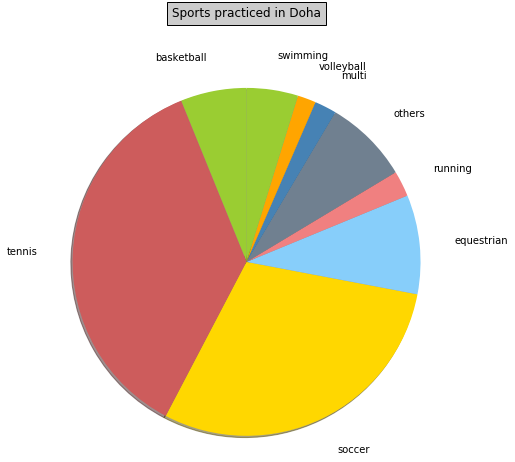

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
%matplotlib inline
sports=doha.find({"sport":{"$exists":"true"}},{"sport":1,"_id":0})
num_sports=sports.count()
sportsdict=defaultdict(int)
for doc in sports:
    sportsdict[doc.values()[0].encode("ascii")]+=1
other_sports=[]
sum_others=0
threshold=5
for k,v in sportsdict.items():
    if (v<threshold):
        other_sports.append(k)
        sum_others+=v
        del sportsdict[k]
sportsdict["others"]=sum_others
colours = ['yellowgreen','indianred', 'gold', 'lightskyblue', 'lightcoral','slategrey','steelblue','orange']
plt.axis("equal")
p=plt.pie(sportsdict.values(),
        labels=sportsdict.keys(),
        startangle=90,
        radius=2.0,
        labeldistance=1.2,
        colors=colours,
        shadow=True)
plt.title('Sports practiced in Doha', bbox={'facecolor':'0.8', 'pad':5},position=(0.5,1.6))
print "There are {} locations dedicated to sports".format(num_sports)
print "Other sports include";pprint(other_sports)

As expected, football('soccer') and equestrian sports are quite popular in Qatar. I was surprised to see that there were more tennis courts than football fields.

## Conclusion

Working with this dataset showed that it was incomplete, and a lot of entries made to it had inconsistencies and inaccuracies, amounting to a lot of dirty data. A large number of venues were listed as "ways" rather than "nodes". Problems such as this could have been easily avoided if first-time contributors to OpenStreetMap had to go through basic mandatory "training". Additionally, there was data that was entered in Arabic. This adds to the complexity in processing, auditing and analysing the entire dataset, and was ignored in this endeavor. Fortunately, this dataset has helped in providing some insights into Doha, even though I only explored a few fields.